<a href="https://colab.research.google.com/github/gjrkdgh0772/Finance/blob/main/lec03_%ED%99%98%EC%9C%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size=6><b> Lec03 .환율  </font>  
<font color=red><b>
환율 : 우리 원화와 외국통화의 교환비율로서 외국통화와 비교한 우리원화의 값어치를 나타냄    

In [ ]:
import pandas as pd
import numpy as np
from datetime import date
import logging
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from IPython.display import Image
import warnings
warnings.filterwarnings(action='ignore')

# numeric_level = getattr(logging, 'INFO', None)
# logging.basicConfig(level=numeric_level, format='%(asctime)s %(levelname)-8s %(message)s', datefmt='%Y-%m-%d %H:%M:%S')

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
#plt.rc('font', family='NanumGothicOTF') # For MacOS
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
sns.set()

# by 김민형
plt.rc('font', family='Malgun Gothic')

# 환율 - 외환보유액
* 8.8.2.1 주요국통화의 대원화 환율 통계자료(평균자료)
* 8.7.1 대외채무
* 8.7.2 대외채권
* 18.1.3.6 외환보유액

In [ ]:
df = pd.read_csv("./dataset/lec03_환율.csv", thousands=',')
df['년도'] = pd.to_datetime(df['년도'], format='%Y').dt.year
df = df.set_index('년도')
df.head()

,외환보유액_억달러,외환보유액대비단기채무_비율,대외채무_억달러,단기채무_억달러,대외채권_억달러,순채권_억달러,통화량_Lf평잔,통화량_Lf평잔증가율,통화량_M2평잔,통화량_M2평잔증가율,...,소비자물가_생활물가_전년동월비,가계신용금액_조원,가계신용금액_조원_전년동기증감액,가계신용금액_조원_전년동기증감율,가계대출금액_조원,가계대출금액_조원_전년동기증감액,가계대출금액_조원_전년동기증감율,판매신용금액_조원,판매신용금액_조원_전년동기증감액,판매신용금액_조원_전년동기증감율
년도,,,,,,,,,,,,,,,,,,,,,
1995,0,175.0,1089,514,859,-230,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,0,238.9,1448,703,1034,-414,0.0,0.0,0.0,0.0,...,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,89,657.9,1616,584,979,-637,659.0,16.3,482.4,18.0,...,6.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1998,485,74.2,1516,360,1210,-305,750.9,13.9,596.2,23.6,...,11.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1999,741,52.0,1398,385,1382,-16,835.9,11.3,676.7,13.5,...,2.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df[['외환보유액_억달러', '외환보유액대비단기채무_비율']] = df[['외환보유액_억달러', '외환보유액대비단기채무_비율']].fillna(method='bfill').astype('float')
df[['외환보유액_억달러', '외환보유액대비단기채무_비율']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 1995 to 2020
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   외환보유액_억달러       26 non-null     float64
 1   외환보유액대비단기채무_비율  26 non-null     float64
dtypes: float64(2)
memory usage: 624.0 bytes


In [ ]:
temp = df[['외환보유액_억달러', '외환보유액대비단기채무_비율']]
temp['외환보유액_증감률'] = df['외환보유액_억달러'].pct_change(periods=1) * 100 

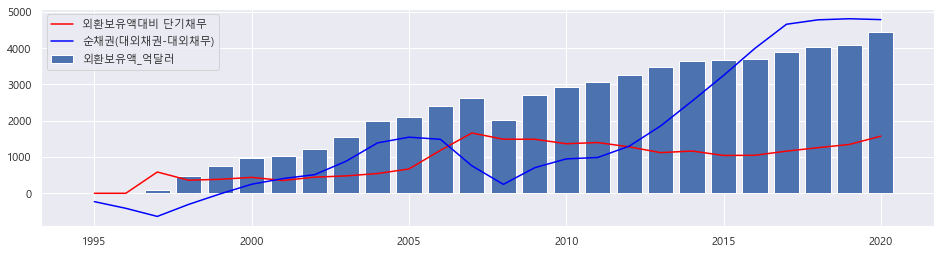

In [ ]:
df['외환보유액대비단기채무_비율금액'] = df['외환보유액_억달러'] * df['외환보유액대비단기채무_비율'] / 100
plt.rcParams["figure.figsize"] = (16, 4)
plt.bar(df.index ,df['외환보유액_억달러'], label='외환보유액_억달러') 
plt.plot(df.index ,df['외환보유액대비단기채무_비율금액'] , label='외환보유액대비 단기채무', color='red') 
plt.plot(df.index ,df['순채권_억달러'] , label='순채권(대외채권-대외채무)', color='blue') 
plt.legend()
plt.show()

* 대외채권 : (+)일정시점 현재 거주자가 비거주자로부터 미래 특정시점에 원금 또는 이자를 회수하게 될 확정채권 잔액
* 대외채무 : (-)일정시점 현재 거주자가 비거주자에 대해 미래 특정시점에 원금 또는 이자를 지급해야 하는 확정채무 잔액

# 환율 - 기준금리
* 2.6.한국은행 기준금리 및 여수신금리 > 기준금리
* 8.8.2.1 주요국통화의 대원화 환율 통계자료(평균자료)

<pre><font color=red><b>
* 환율상승 --> 원화가치 하락  --> 외국의 투자자본이 빠져나간다 --> 통화량증대 --> 기준금리 인상
           --> 외화가치 상승

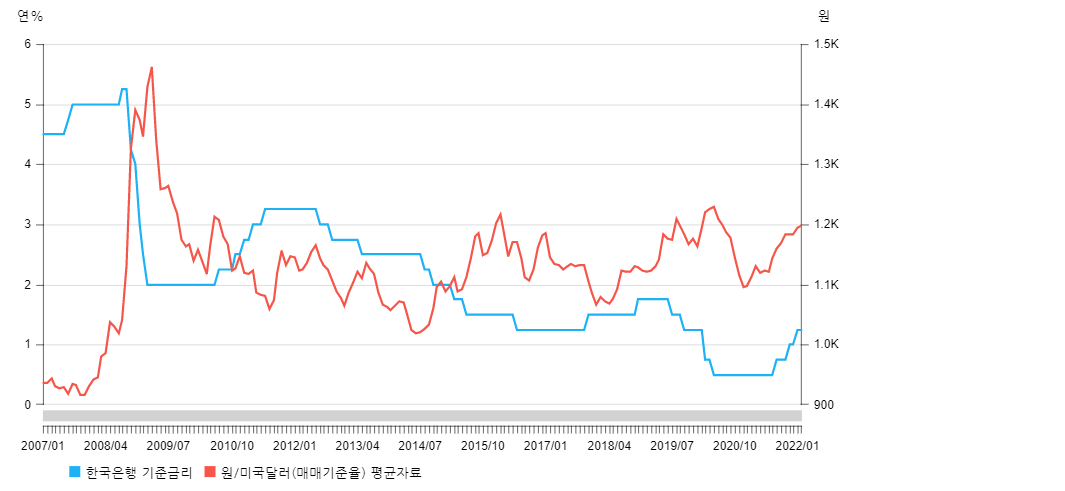

In [ ]:
Image(filename='./img/lec03_1.png')

# 환율 - 주가(종가)
* 8.8.2.1 주요국통화의 대원화 환율 통계자료(평균자료)
* 6.1.2 주식거래 및 주가지수 > KOSPI평균

<pre><font color=red><b>
* 환율상승 --> 원화가치 하락  --> 외국의 투자자본이 빠져나간다 (주식매도:원화를 달러로 교환) --> 주가하락
           --> 외화가치 상승

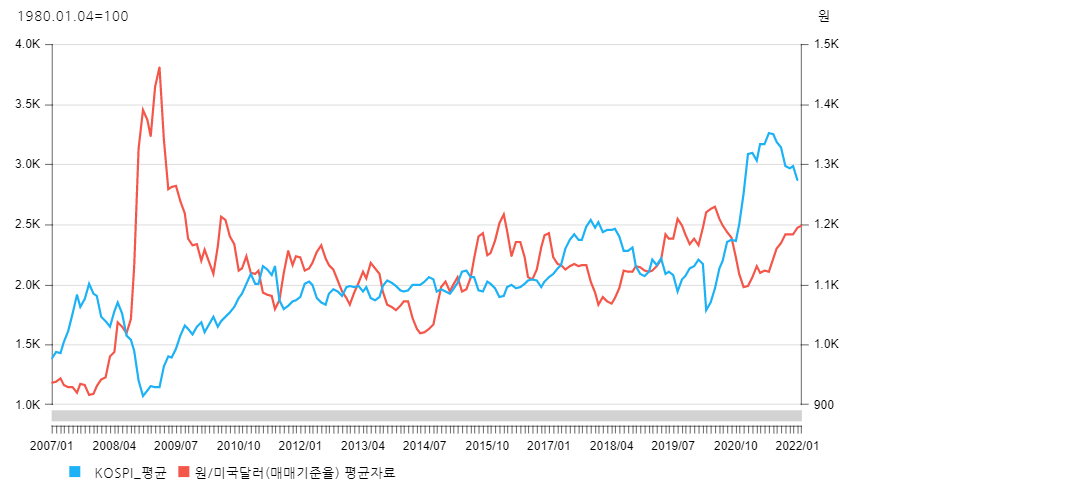

In [ ]:
Image(filename='./img/lec03_2.png')

# 환율 - 채권
* 8.8.2.1 주요국통화의 대원화 환율 통계자료(평균자료)
* 4.1.2 시장금리(월,분기,년) > 국고채(3년)

<pre><font color=red><b>
* 환율상승 --> 원화가치 하락  --> 외국의 투자자본이 빠져나간다 (채권매도:원화를 달러로 교환) --> 채권하락
           --> 외화가치 상승

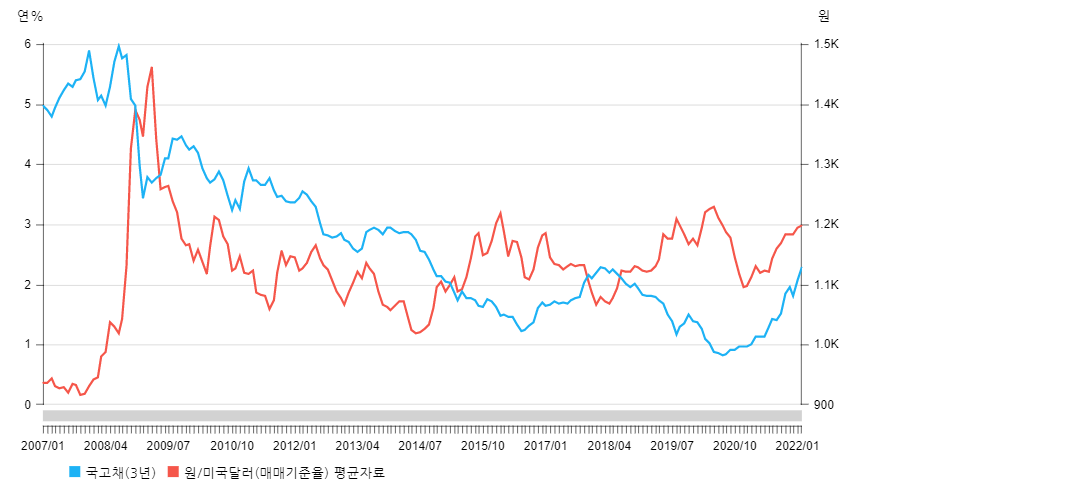

In [ ]:
Image(filename='./img/lec03_3.png')

# 환율 - 생산자/소비자 물가지수  ------------------ ??? 
* 원자재 관련 생산자 물가지수만 넣고 다시 시도

<pre><font color=red><b>
* 환율상승 --> 원화가치 하락  --> 유가 수입이로 인한 원자재가는 상승 --> 관련 생산자물가지수 증가
                                                                     --> 소비자물가지수 양행 거의없음(우상향)
           --> 외화가치 상승 --> 유가하락 (달러가치 상승으로 동일 가격으로 더 많은 유가 매수 가능)

* 8.8.2.1 주요국통화의 대원화 환율 통계자료(평균자료)
* 18.1.2.1 생산자물가지수 - 파란색
* 18.1.2.2 소비자물가지수 - 붉은색

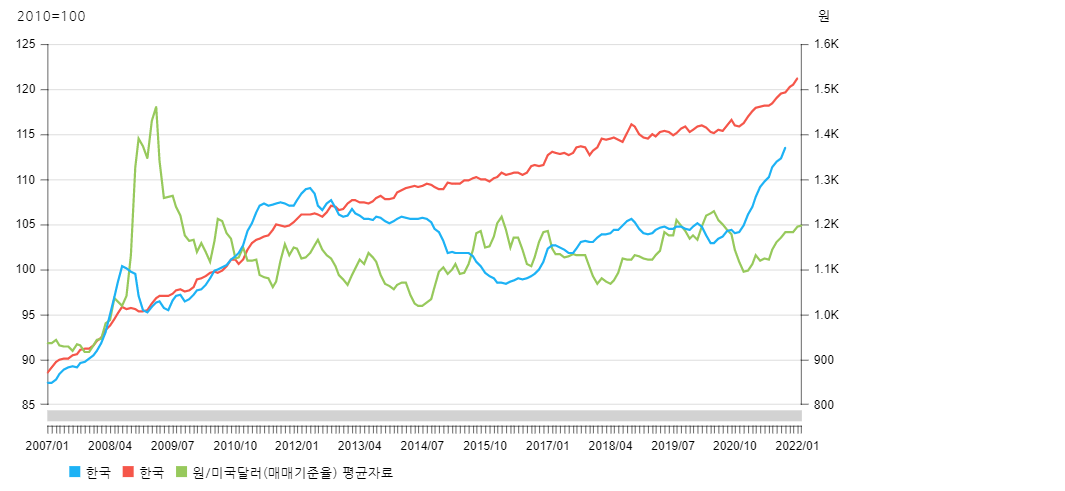

In [ ]:
Image(filename='./img/lec03_41.png')

# 환율 - 생산재 수입물가지수
* 8.8.2.1 주요국통화의 대원화 환율 통계자료(평균자료)
* 7.2.국내공급물가지수(2015=100) > 생산재 제조/건설/연료(수입)

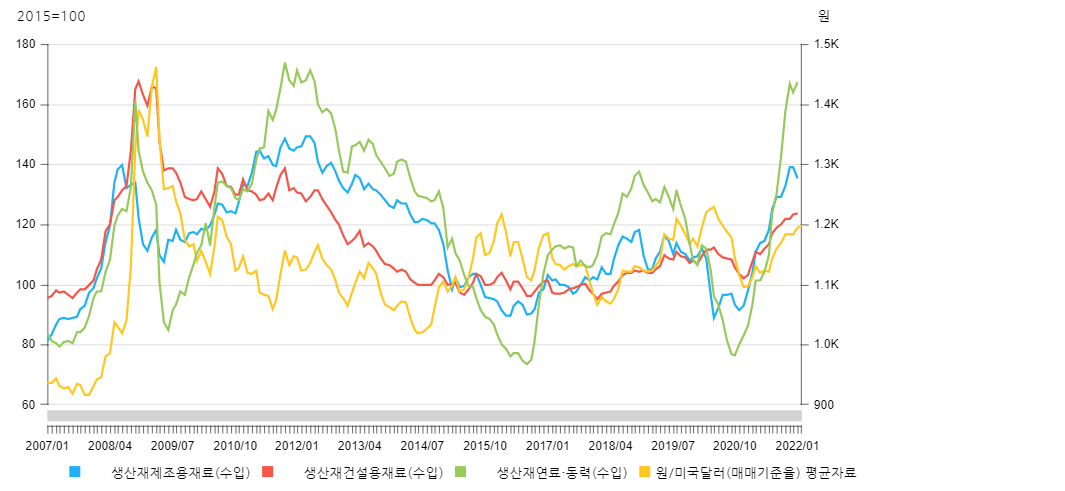

In [ ]:
Image(filename='./img/lec03_4.png')

# 환율 - 수출입 - 수출총액  ------------- ??
* 한 국가의 수출을 좌우하는것은 단순이 환율만은 아니다 - 대외적 요소가 더 많다.
* 8.8.2.1 주요국통화의 대원화 환율 통계자료(평균자료)
* 8.4.1 수출금액지수(관세청)

<pre><font color=red><b>
* 환율상승 --> 원화가치 하락  --> 원화가격 경쟁력이 생긴다    --> 수출증대
                               (1달러1000원하던 상품이 1달러500원이면 동일 상품을 2개 구매가능)
           --> 외화가치 상승 --> 수입이윤을 환전하면 500원 이문 --> 수입감소

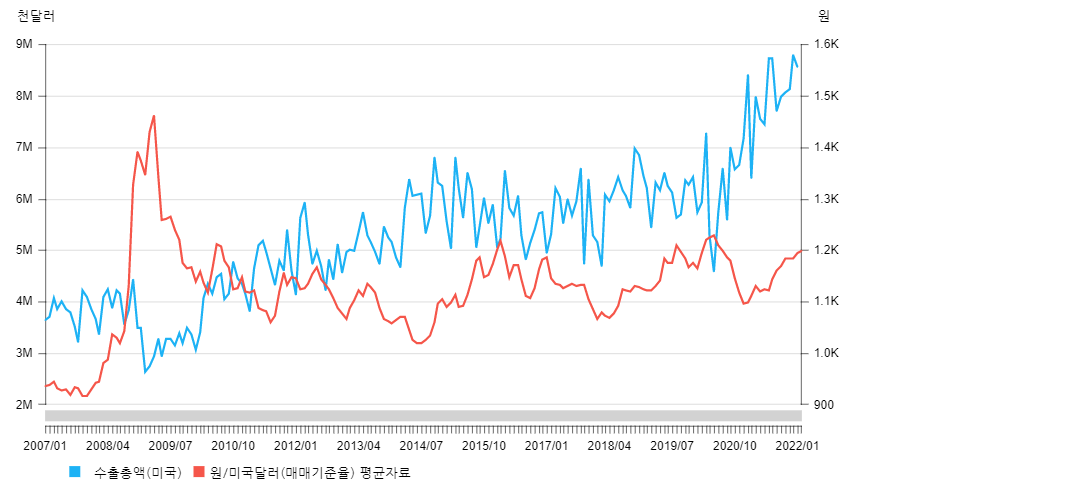

In [ ]:
Image(filename='./img/lec03_5.png')

# 환율 - 부동산(서울 실거래 아파트가격)

<pre><font color=red><b>
* 환율상승 --> 원화가치 하락  --> 외국의 투자자본이 빠져나간다 --> 통화량증대 --> 기준금리 인하 --> 부동산가격 상승
           --> 외화가치 상승 

* 8.8.2.1 주요국통화의 대원화 환율 통계자료(평균자료)
* 7.7.7 아파트 매매 실거래가격지수 > 서울
* 2.6.한국은행 기준금리 및 여수신금리 > 기준금리

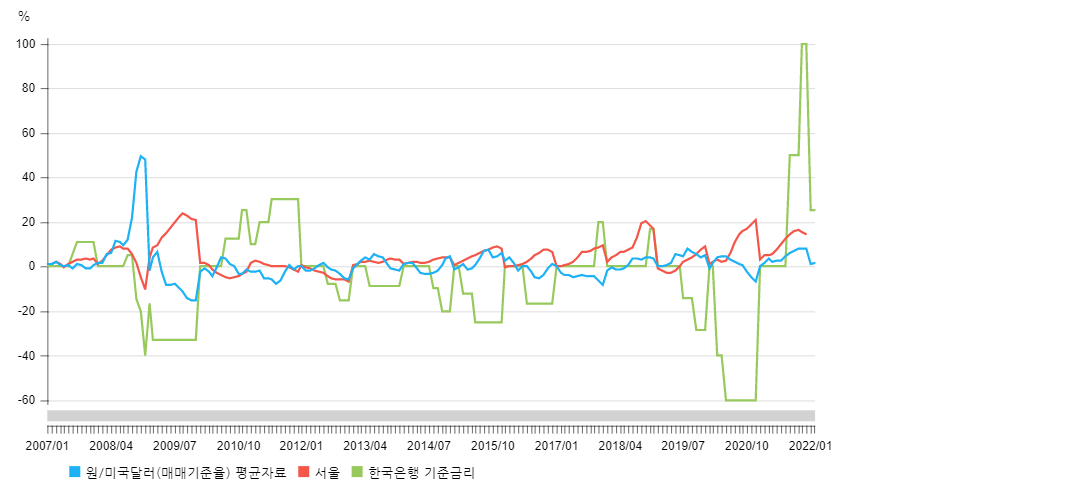

In [ ]:
Image(filename='./img/lec03_6.png')